In [ ]:
import pandas as pd
df = pd.read_csv('covid.csv',parse_dates=['Date'])

In [ ]:
a = ['hello','Google','ABC']
type(a)

list

In [ ]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [ ]:
type(df['Country/Region'][0])

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#2020/01/22
#22/01/2020

In [ ]:
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
top = df[df['Date'] == df['Date'].max()]

In [ ]:
top.head(7)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa
48812,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-07-27,86,3,65,18,Americas
48813,NaN,Argentina,-38.41610,-63.616700,2020-07-27,167416,3059,72575,91782,Americas


In [ ]:
top['Country/Region'].value_counts()

China             33
Canada            12
France            11
United Kingdom    11
Australia          8
                  ..
Zimbabwe           1
Spain              1
Guyana             1
Morocco            1
Monaco             1
Name: Country/Region, Length: 187, dtype: int64

In [ ]:
top.groupby('Country/Region')['Confirmed','Active'].sum().sort_values(['Confirmed'],ascending = False).head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Active
Country/Region,,
US,4290259,2816444
Brazil,2442375,508116
India,1480073,495499
Russia,816680,201097
South Africa,452529,170537
Mexico,395489,47657
Peru,389717,98752
Chile,347923,18782
United Kingdom,301708,254427


In [ ]:
top.groupby('Country/Region')['Confirmed'].mean()

Country/Region
Afghanistan           36263.0
Albania                4880.0
Algeria               27973.0
Andorra                 907.0
Angola                  950.0
                       ...   
West Bank and Gaza    10621.0
Western Sahara           10.0
Yemen                  1691.0
Zambia                 4552.0
Zimbabwe               2704.0
Name: Confirmed, Length: 187, dtype: float64

In [ ]:
df_top = top.groupby('Country/Region')['Confirmed','Active','Recovered','Deaths'].sum().sort_values(['Active'],ascending=False).head(20).reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


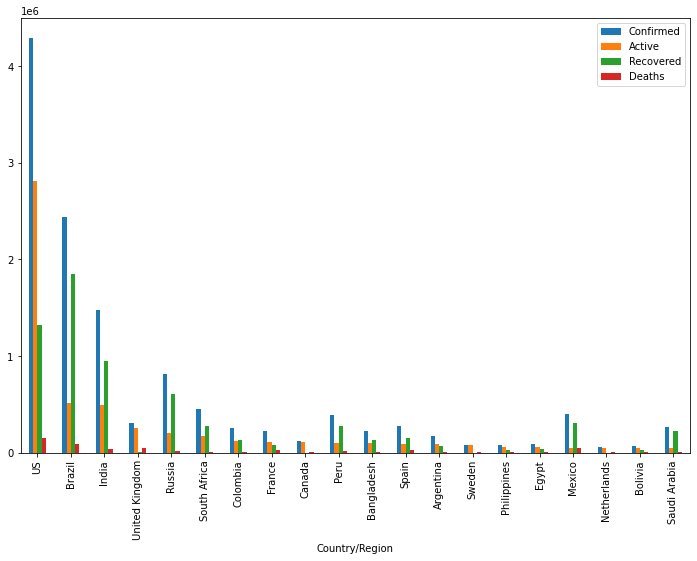

In [ ]:
df_top.plot(x='Country/Region',y=['Confirmed','Active','Recovered','Deaths'],
            kind='bar',figsize=(12,8),)

Compare the covid conditions in different contries
US,Brazil,India,United Kingdom, Russia

In [ ]:
US = df[df['Country/Region'] == 'US']
US = US[['Date','Confirmed','Deaths','Recovered','Active']]
US.head()

,Date,Confirmed,Deaths,Recovered,Active
223,2020-01-22,1,0,0,1
484,2020-01-23,1,0,0,1
745,2020-01-24,2,0,0,2
1006,2020-01-25,2,0,0,2
1267,2020-01-26,5,0,0,5


In [ ]:
Brazil = df[df['Country/Region'] == 'Brazil']
Brazil = Brazil[['Date','Confirmed','Deaths','Recovered','Active']]
Brazil.tail()

,Date,Confirmed,Deaths,Recovered,Active
47791,2020-07-23,2287475,84082,1620313,583080
48052,2020-07-24,2343366,85238,1693214,564914
48313,2020-07-25,2394513,86449,1785359,522705
48574,2020-07-26,2419091,87004,1812913,519174
48835,2020-07-27,2442375,87618,1846641,508116


In [ ]:
India = df[df['Country/Region'] == 'India']
India = India[['Date','Confirmed','Deaths','Recovered','Active']]
India.head()

,Date,Confirmed,Deaths,Recovered,Active
129,2020-01-22,0,0,0,0
390,2020-01-23,0,0,0,0
651,2020-01-24,0,0,0,0
912,2020-01-25,0,0,0,0
1173,2020-01-26,0,0,0,0


In [ ]:
UK = df[df['Country/Region'] == 'United Kingdom']
UK = UK[['Date','Confirmed','Deaths','Recovered','Active']]
UK = UK.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
UK.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [ ]:
Russia = df[df['Country/Region'] == 'Russia']
Russia = Russia[['Date','Confirmed','Deaths','Recovered','Active']]
Russia.head()

,Date,Confirmed,Deaths,Recovered,Active
185,2020-01-22,0,0,0,0
446,2020-01-23,0,0,0,0
707,2020-01-24,0,0,0,0
968,2020-01-25,0,0,0,0
1229,2020-01-26,0,0,0,0


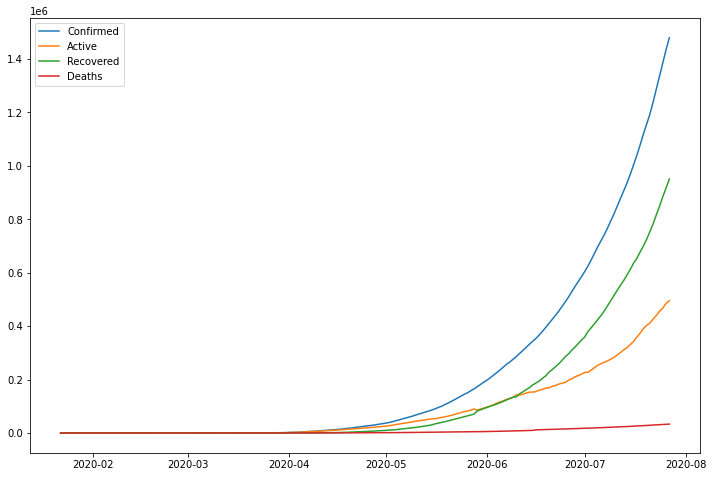

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(India['Date'],India['Confirmed'],label='Confirmed')
plt.plot(India['Date'],India['Active'],label='Active')
plt.plot(India['Date'],India['Recovered'],label='Recovered')
plt.plot(India['Date'],India['Deaths'],label='Deaths')
plt.legend()
plt.show()

In [ ]:
India.head()

,Date,Confirmed,Deaths,Recovered,Active
129,2020-01-22,0,0,0,0
390,2020-01-23,0,0,0,0
651,2020-01-24,0,0,0,0
912,2020-01-25,0,0,0,0
1173,2020-01-26,0,0,0,0


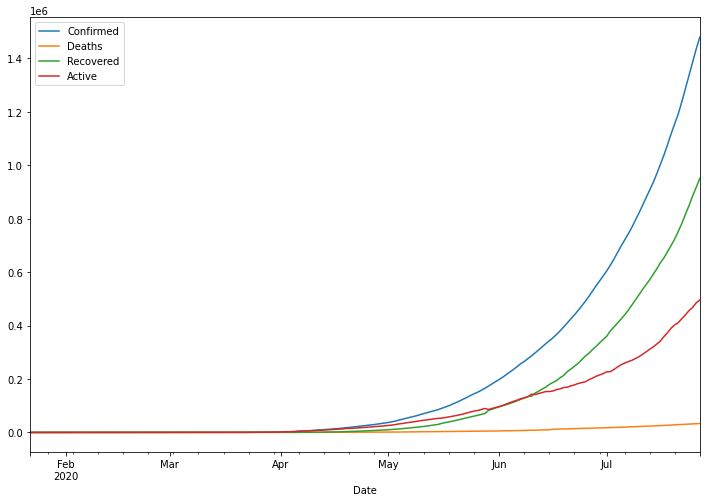

In [ ]:
India.plot(x='Date',y=['Confirmed','Deaths','Recovered','Active'],figsize=(12,8),kind='line')

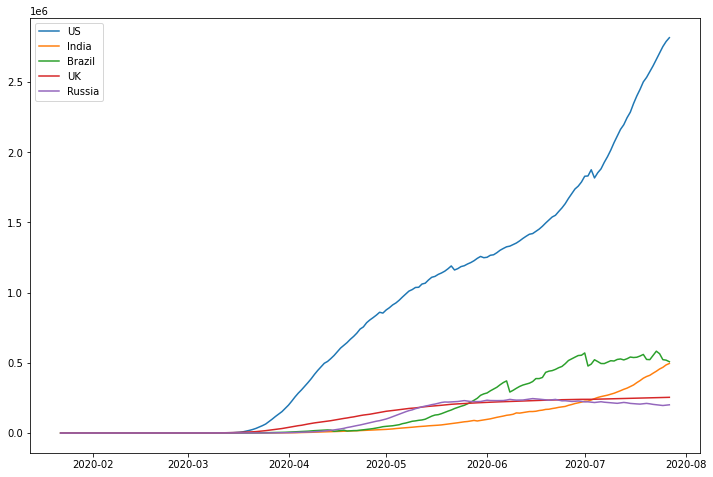

In [ ]:
#Compare the recovery of 5 top contries using plot
plt.figure(figsize=(12,8))
plt.plot(US['Date'],US['Active'],label = 'US')
plt.plot(India['Date'],India['Active'], label = 'India')
plt.plot(Brazil['Date'],Brazil['Active'], label='Brazil')
plt.plot(UK['Date'],UK['Active'], label='UK')
plt.plot(Russia['Date'],Russia['Active'],label='Russia')
plt.legend(loc=0)
plt.show()

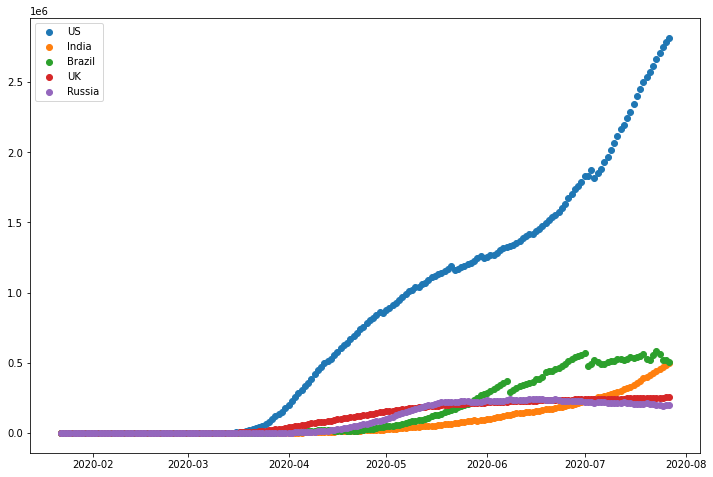

In [ ]:
#Compare the recovery of 5 top contries using plot
plt.figure(figsize=(12,8))
plt.scatter(US['Date'],US['Active'],label = 'US')
plt.scatter(India['Date'],India['Active'], label = 'India')
plt.scatter(Brazil['Date'],Brazil['Active'], label='Brazil')
plt.scatter(UK['Date'],UK['Active'], label='UK')
plt.scatter(Russia['Date'],Russia['Active'],label='Russia')
plt.legend(loc=0)
plt.show()

1. Average price of all the items containing Chicken
2. Maximum ordered item
3. Extract all the data with 'Apple' present in choice_description
4. Most expensive and most cheaper item
5. All items which has been ordered in quantity 3 or more

In [ ]:
#Ananlysis of a restaurant Data
import pandas as pd
chips = pd.read_csv('http://bit.ly/chiporders',sep='\t')
chips.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
#Average price of all the items containing Chicken
chips[chips['item_name'].str.contains('Chicken')]['item_price'].str.replace('$','').astype(float).mean()

10.133724358974309

In [ ]:
chips.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [ ]:
chips['choice_description'] = chips['choice_description'].fillna('x')

In [ ]:
#Extract all the data with 'Apple' present in choice_description
chips[chips['choice_description'].str.contains('Apple')]

,order_id,quantity,item_name,choice_description,item_price
2,1,1,Nantucket Nectar,[Apple],$3.39
173,77,1,Nantucket Nectar,[Apple],$3.39
1706,690,1,Nantucket Nectar,[Apple],$3.39
2381,947,1,Nantucket Nectar,[Apple],$3.39
2818,1118,1,Nantucket Nectar,[Apple],$3.39
2853,1133,1,Nantucket Nectar,[Apple],$3.39


In [ ]:
#Maximum ordered item
chips.groupby('item_name')['quantity'].sum().sort_values(ascending=False).idxmax()

'Chicken Bowl'

In [ ]:
chips.groupby('item_name')['quantity'].sum().idxmax()

'Chicken Bowl'

In [ ]:
chips.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [ ]:
chips.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [ ]:
ordered_quantity = chips.groupby('item_name')['quantity'].sum().reset_index()
ordered_quantity.loc[ordered_quantity['quantity'].idxmax()]['item_name']

'Chicken Bowl'

In [ ]:
chips[chips['quantity'] > 3]

,order_id,quantity,item_name,choice_description,item_price
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$35.00
1257,511,4,Chips and Fresh Tomato Salsa,x,$11.80
1425,577,4,Bottled Water,x,$6.00
1880,759,4,Bottled Water,x,$6.00
2235,901,4,Canned Soda,[Sprite],$4.36
2441,970,5,Bottled Water,x,$7.50
3598,1443,15,Chips and Fresh Tomato Salsa,x,$44.25
3599,1443,7,Bottled Water,x,$10.50
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00
3887,1559,8,Side of Chips,x,$13.52


In [ ]:
chips['item_price'].max()

'$9.39 '

In [ ]:
chips.loc[chips['item_price'].str.replace('$','').astype(float).idxmax()]['item_name']

'Chips and Fresh Tomato Salsa'

In [ ]:
chips['price'] = chips['item_price'].str.replace('$','').astype(float)

In [ ]:
chips.head(5)
chips[chips['price'] == chips['price'].max()]['item_name']

3598    Chips and Fresh Tomato Salsa
Name: item_name, dtype: object

In [ ]:
chips[chips['price'] == chips['price'].min()]

,order_id,quantity,item_name,choice_description,item_price,price
28,14,1,Canned Soda,[Dr. Pepper],$1.09,1.09
34,17,1,Bottled Water,NaN,$1.09,1.09
53,24,1,Canned Soda,[Sprite],$1.09,1.09
87,38,1,Bottled Water,NaN,$1.09,1.09
107,47,1,Canned Soda,[Dr. Pepper],$1.09,1.09
...,...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],$1.09,1.09
4001,1602,1,Bottled Water,NaN,$1.09,1.09
4008,1604,1,Canned Soda,[Diet Coke],$1.09,1.09
4051,1621,1,Canned Soda,[Sprite],$1.09,1.09
